# Desafio - Ciência de Dados Iniciante - Ascan
### Luna Costa
- O objetivo deste notebook é de realizar uma análise dos dados respondendo as Perguntas guias, Perguntas chaves e Perguntas do desafio propostas pelo desafio final da trilha de ciência de dados iniciante e após, realizar o processamento desses mesmos dados para treinamento em 3 modelos de aprendizagem de máquina e posterior resposta dessas mesmas perguntas na parte de aprendizagem de máquinas

## Dicionário dos Dados

Metadata:
 
| **Variável**         | **Descrição**           |**Valores Chaves**          |
| ---------------- | ------------------- | ---------------------- |
| sobreviveu       | Se sobreviveu ou não ao acidente.            |Não sobreviveu = False, Sobreviveu = Yes |
| classe_bilhete   | Classe do bilhete comprado.      |1=Primeira Classe, 2=Segunda Classe, 3=Terceira Classe |
| genero           | Gênero do passageiro.                 |M=Masculino, F=Feminino       |
| idade            | Idade em anos e meses.        |Min=0.42 ~ Max=80.0       |
| irmaos_conjuges_abordo    | Número de irmãos/cônjuges a bordo do Titanic.  |Min=0 ~ Max=6       |
| pais_filhos_abordo      | Número de pais/filhos a bordo do Titanic.   |Min=0 ~ Max=8       |
| numero_bilhete   | Número do Bilhete.     |Combinação de texto e número.       |
| preco_bilhete    | Preço pago no Bilhete.    |Min=0.00 ~ Max=512.32       |
| cabine_numero    | Número da Cabine do Passageiro.        |Combinação de texto e número.       |
| local_embarque   | Cidade que o passageiro embarcou. |Valores válidos=['Southampton', 'Cherbourg', 'Queenstown'] |

In [1]:
# importar libs necessárias
# libs necessárias para EDA e visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr  # Função para calcular o coeficiente de correlação
from scipy.stats import ttest_ind # Função para realizar o teste t
# libs necessárias para treinamento dos modelos de machine learning
from sklearn.model_selection import RepeatedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
# libs necessárias para Análise dos dados e machine learning
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df.head()

numerica = [
    "idade",
    "preco_bilhete",
    "irmaos_conjuges_abordo",
    "pais_filhos_abordo"
]

categorica = [
    "classe_bilhete",
    "genero",
    "numero_bilhete",
    "cabine_numero",
    "local_embarque",
    "sobreviveu",
]

## EDA
- Agora iniciando a Análise Exploratória dos Dados

#### Perguntas guias para as categorias númerias:
- Existem dados faltantes no seu conjunto?
- Quais as suas distribuições?
- Temos outliers neste subconjunto? (utilize a definição numérica de outliers apresentado na trilha para fazer essa verificação)
- Existe alguma correlação entre essas variáveis numéricas? (não precisa olhar para outras categorias no momento)

In [3]:
# Tamanho do conjunto de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   sobreviveu              891 non-null    bool   
 1   classe_bilhete          891 non-null    int64  
 2   genero                  891 non-null    object 
 3   idade                   714 non-null    float64
 4   irmaos_conjuges_abordo  891 non-null    int64  
 5   pais_filhos_abordo      891 non-null    int64  
 6   numero_bilhete          891 non-null    object 
 7   preco_bilhete           891 non-null    float64
 8   cabine_numero           204 non-null    object 
 9   local_embarque          889 non-null    object 
dtypes: bool(1), float64(2), int64(3), object(4)
memory usage: 70.5+ KB


#### Existem dados faltantes no seu conjunto?

   Count Column
0    177  idade


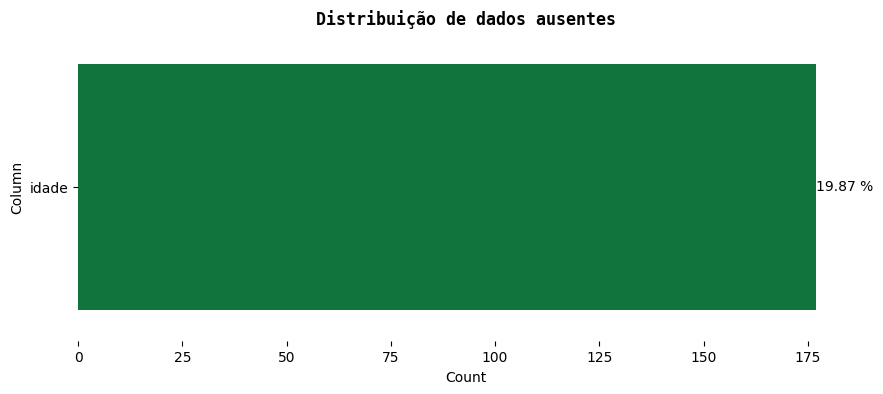

In [4]:
# Existem dados faltantes no seu conjunto?

# Tabela com as informações de dados faltantes total
missing_data_size = df.select_dtypes(exclude=['object','bool']).isnull().sum()
missing_data_columns = ((missing_data_size[missing_data_size>0]).sort_values(ascending=False).to_frame(name='Count'))
missing_data_columns = (missing_data_columns.assign(Column=missing_data_columns.index)).reset_index(drop=True)
print(missing_data_columns)

# Gráfico com as informações de dados faltantes em porcentagem
plt.figure(figsize=(10,4))
ax = sns.barplot(data=missing_data_columns,x='Count',y='Column',color='#00853B')
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f"{i:.2f} %" for i in missing_data_columns.Count.astype(int) / len(df)*100])
plt.title(
    "Distribuição de dados ausentes",
    fontsize='large',
    loc='center',
    fontweight='bold',
    family='monospace')
plt.show()
ax.figure.savefig("missing_data_num.jpg")

#### Quais as suas distribuições?

       classe_bilhete       idade  irmaos_conjuges_abordo  pais_filhos_abordo  \
count      891.000000  714.000000              891.000000          891.000000   
mean         2.308642   29.699118                0.523008            0.381594   
std          0.836071   14.526497                1.102743            0.806057   
min          1.000000    0.420000                0.000000            0.000000   
25%          2.000000   20.125000                0.000000            0.000000   
50%          3.000000   28.000000                0.000000            0.000000   
75%          3.000000   38.000000                1.000000            0.000000   
max          3.000000   80.000000                8.000000            6.000000   

       preco_bilhete  
count     891.000000  
mean       32.204208  
std        49.693429  
min         0.000000  
25%         7.910400  
50%        14.454200  
75%        31.000000  
max       512.329200  


array([[<AxesSubplot: title={'center': 'classe_bilhete'}>,
        <AxesSubplot: title={'center': 'idade'}>],
       [<AxesSubplot: title={'center': 'irmaos_conjuges_abordo'}>,
        <AxesSubplot: title={'center': 'pais_filhos_abordo'}>],
       [<AxesSubplot: title={'center': 'preco_bilhete'}>,
        <AxesSubplot: >]], dtype=object)

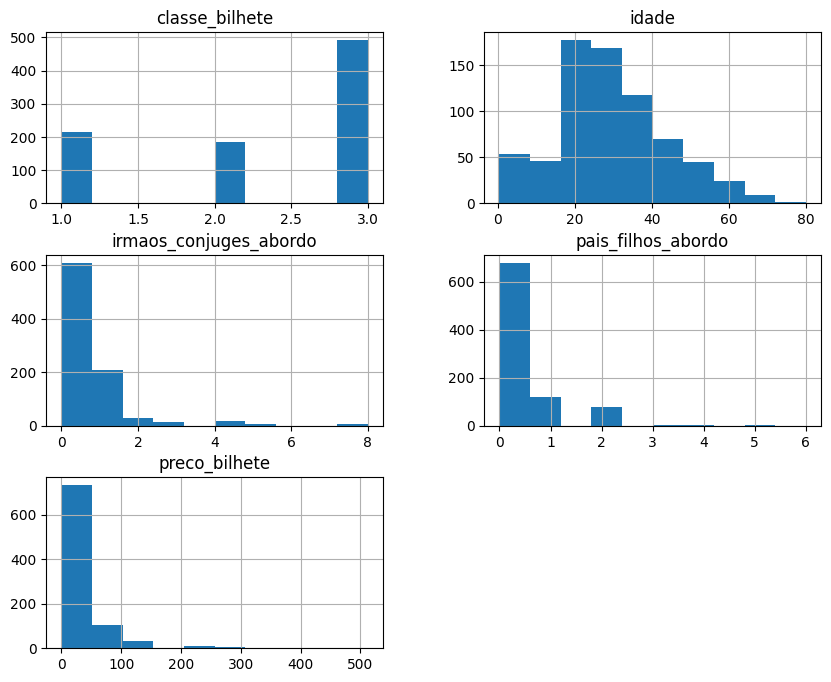

In [33]:
# Quais as suas distribuições?
print(df.describe())
# histograma com a distribuição das variáveis numéricas
df.hist(figsize=(10,8))

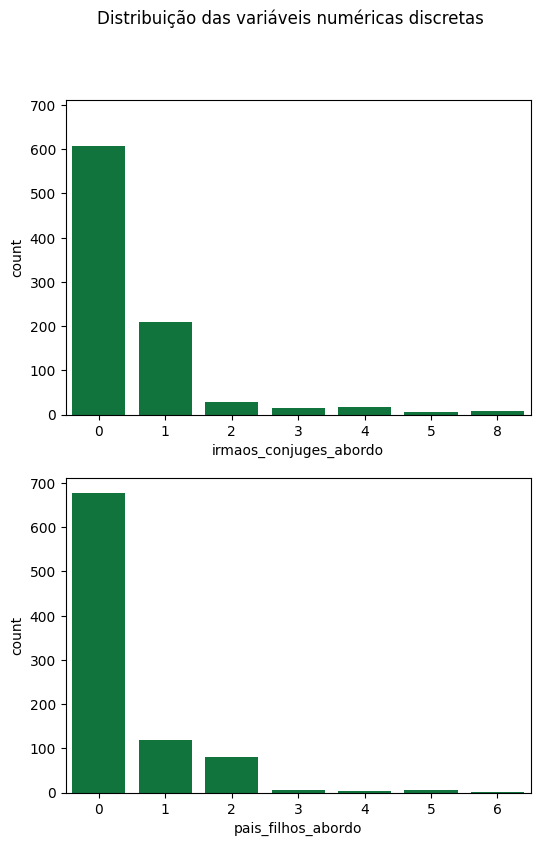

In [17]:
# para as variáveis discretas
fig,axes = plt.subplots(2,1, figsize = (6,9), sharey=True)
fig.suptitle('Distribuição das variáveis numéricas discretas')
sns.countplot(ax=axes[0], x="irmaos_conjuges_abordo", data=df, color="#00853B")
sns.countplot(ax=axes[1], x="pais_filhos_abordo", data=df, color="#00853B")
# sns.countplot(ax=axes[1], x="genero", data=df, color="#00853B")
plt.show()
fig.figure.savefig("disc_num_distr.jpg")

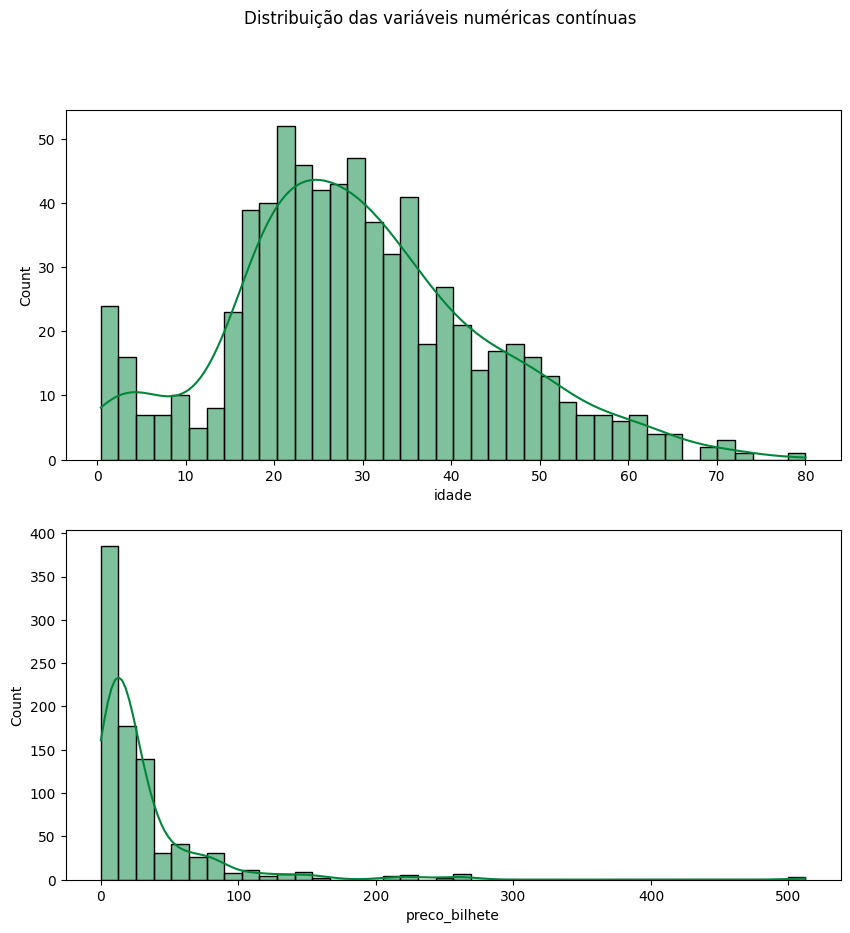

In [12]:
fig,axes = plt.subplots(2,1,figsize=(10,10))
float_columns = df.select_dtypes(include=[float])
for column,axe in zip(float_columns,fig.axes):
    sns.histplot(ax=axe,data=df,x=column,bins=40,kde=True,color="#00853B")

fig.suptitle('Distribuição das variáveis numéricas contínuas')

plt.show()
fig.figure.savefig("disc_num_cont.jpg")

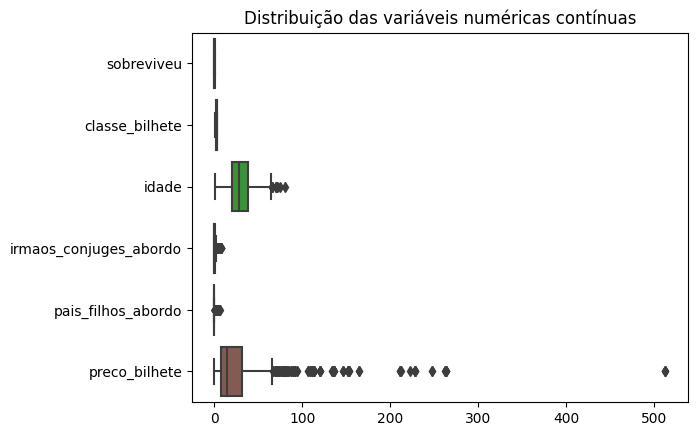

<Figure size 640x480 with 0 Axes>

In [11]:
fig = sns.boxplot(data=df, orient="h")
fig.set_title('Distribuição das variáveis numéricas contínuas')
# já podemos perceber aqui a presença de outliers na variável preco_bilhete
# porém, não conseguimos ver direito a idade
plt.show()
# fig.figure.savefig("disc_num_distr.jpg")
plt.savefig('cont_num_distr.jpg')

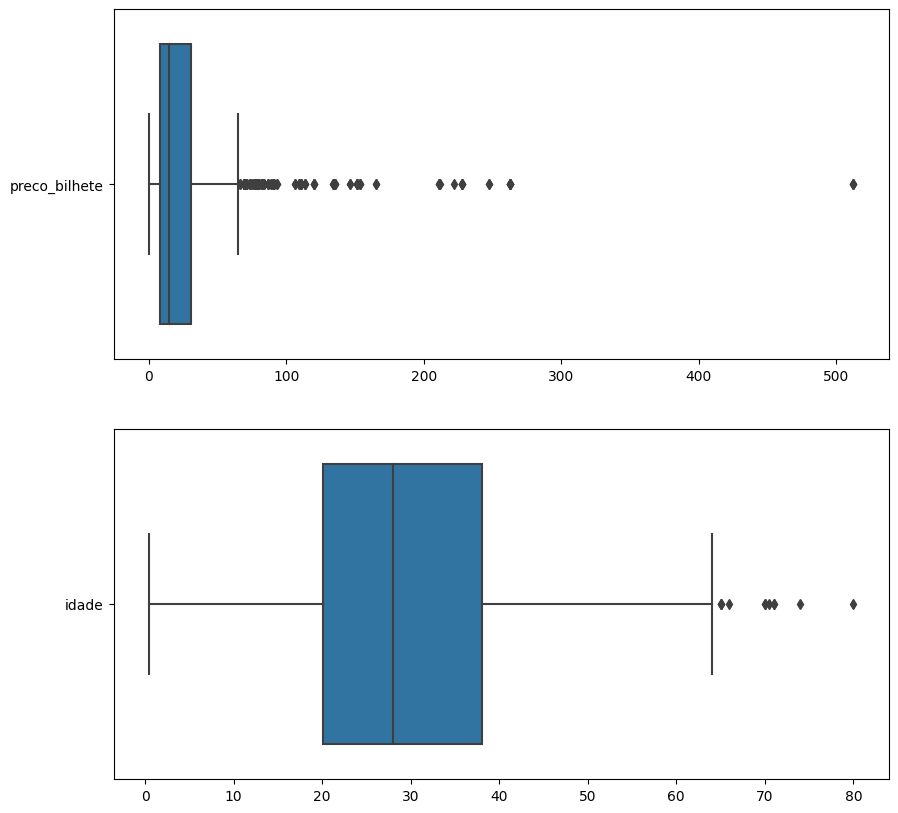

In [12]:
fig,axes = plt.subplots(2,1, figsize=(10,10))
sns.boxplot(ax=axes[0], data=df[["preco_bilhete"]], orient="h")
sns.boxplot(ax=axes[1], data=df[["idade"]],orient="h")
plt.show()
# aqui fica bem claro que temos outliers em ambas as variáveis, mais ainda no preco_bilhete

#### Temos outliers neste subconjunto?

In [64]:
# Temos outliers neste subconjunto? 
# (Utilizando a definição numérica de outliers apresentado na trilha para fazer essa verificação)
# Utilizando o teste de Tukey, conhecido também como Método do intervalo interquartil 
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# outliers = df[(df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))]
# print(outliers)

variaveis_numericas = [
    "idade",
    "preco_bilhete",
    "irmaos_conjuges_abordo",
    "pais_filhos_abordo"
]

def cal_outliers(col):
    # calcula os limites para identificar outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # seleciona os outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    # mostra os outliers
    # print(outliers['idade'])

    # calcula a porcentagem de outliers
    porcentagem_outliers = len(outliers) / df[col].shape[0] * 100
    # mostra a porcentagem de outliers
    print(f"Porcentagem de outliers na coluna {col}: {porcentagem_outliers:.2f}%")

cal_outliers('idade')
cal_outliers('preco_bilhete')
cal_outliers('irmaos_conjuges_abordo')
cal_outliers('pais_filhos_abordo')

Porcentagem de outliers na coluna idade: 1.23%
Porcentagem de outliers na coluna preco_bilhete: 13.02%
Porcentagem de outliers na coluna irmaos_conjuges_abordo: 5.16%
Porcentagem de outliers na coluna pais_filhos_abordo: 23.91%


#### Existe alguma correlação entre essas variáveis numéricas?

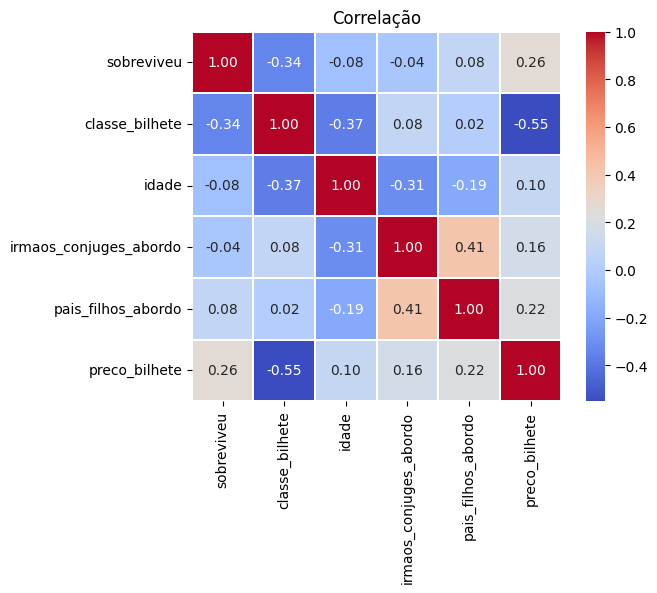

In [18]:
# (não precisa olhar para outras categorias no momento)

# # Forma como o material faz
# corr = df.corr()
# corr.style.background_gradient(cmap='coolwarm')
# Forma que eu acho mais legal:
# plotar o heatmap para as variáveis numéricas
ax = plt.axes()
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', ax=ax, annot=True)

ax.set_title('Correlação')
plt.show()

ax.figure.savefig("heatmap.jpg")

Coeficiente de correlação: -0.5494996199439078
Valor p: 2.2029536583495484e-66


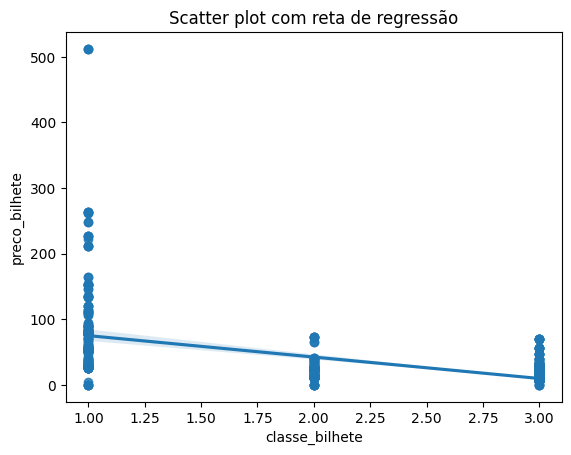

In [75]:
# CONT. Existe alguma correlação entre essas variáveis numéricas? 
# Cálculo do coeficiente de correlação
corr_coef, _ = pearsonr(df['classe_bilhete'], df['preco_bilhete'])
print('Coeficiente de correlação:', corr_coef)

# Realização do teste t
t_statistic, p_value = ttest_ind(df['classe_bilhete'], df['preco_bilhete'])
print('Valor p:', p_value)

# OBS: o resultado indica que muito provavelmente existe sim uma correlação
sns.regplot(x='classe_bilhete', y='preco_bilhete', data=df)
plt.title("Scatter plot com reta de regressão")
plt.show()

Coeficiente de correlação: -0.5494996199439078
Valor p: 2.2029536583495484e-66


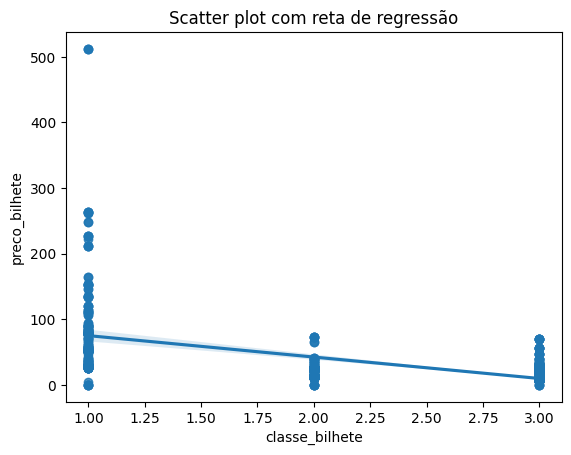

Valor F:  322.38173141585065
Valor p:  2.2029536583490268e-66


ModuleNotFoundError: No module named 'statsmodels'

In [78]:
# CONT. Existe alguma correlação entre essas variáveis numéricas? 
# Cálculo do coeficiente de correlação
corr_coef, _ = pearsonr(df['classe_bilhete'], df['preco_bilhete'])
print('Coeficiente de correlação:', corr_coef)

# Realização do teste t
t_statistic, p_value = ttest_ind(df['classe_bilhete'], df['preco_bilhete'])
print('Valor p:', p_value)

# OBS: o resultado indica que muito provavelmente existe sim uma correlação
sns.regplot(x='classe_bilhete', y='preco_bilhete', data=df)
plt.title("Scatter plot com reta de regressão")
plt.show()

# Executando o teste ANOVA
f_value, p_value = stats.f_oneway(df['classe_bilhete'], df['preco_bilhete'])

# Imprimindo os resultados
print("Valor F: ", f_value)
print("Valor p: ", p_value)

import statsmodels.api as sm

# Lendo o DataFrame
df = pd.read_csv("dados.csv")

# Criando o modelo de regressão linear
X = df['classe_bilhete']
y = df['preco_bilhete']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Imprimindo o sumário do modelo
print(model.summary())

In [73]:
corr_coef, _ = pearsonr(df['classe_bilhete'], df['sobreviveu'])
print('Coeficiente de correlação:', corr_coef)

# Realização do teste t
t_statistic, p_value = ttest_ind(df['classe_bilhete'], df['sobreviveu'])
print('Valor p:', p_value)

# OBS: o resultado indica que muito provavelmente existe sim uma correlação
# OBS2: isso aqui já é uma investigação pra uma das PERGUNTAS DO DESAFIO

Coeficiente de correlação: -0.33848103596101514
Valor p: 0.0


In [72]:
corr_coef, _ = pearsonr(df['irmaos_conjuges_abordo'], df['pais_filhos_abordo'])
print('Coeficiente de correlação:', corr_coef)

# Realização do teste t
t_statistic, p_value = ttest_ind(df['irmaos_conjuges_abordo'], df['pais_filhos_abordo'])
print('Valor p:', p_value)

# OBS: o resultado indica que muito provavelmente existe sim uma correlação
# OBS2: isso aqui já é uma investigação pra uma das PERGUNTAS DO DESAFIO

Coeficiente de correlação: 0.41483769862015646
Valor p: 0.002030415932901255


<__array_function__ internals>:200: RuntimeWarning: Converting input from bool to <class 'numpy.uint8'> for compatibility.


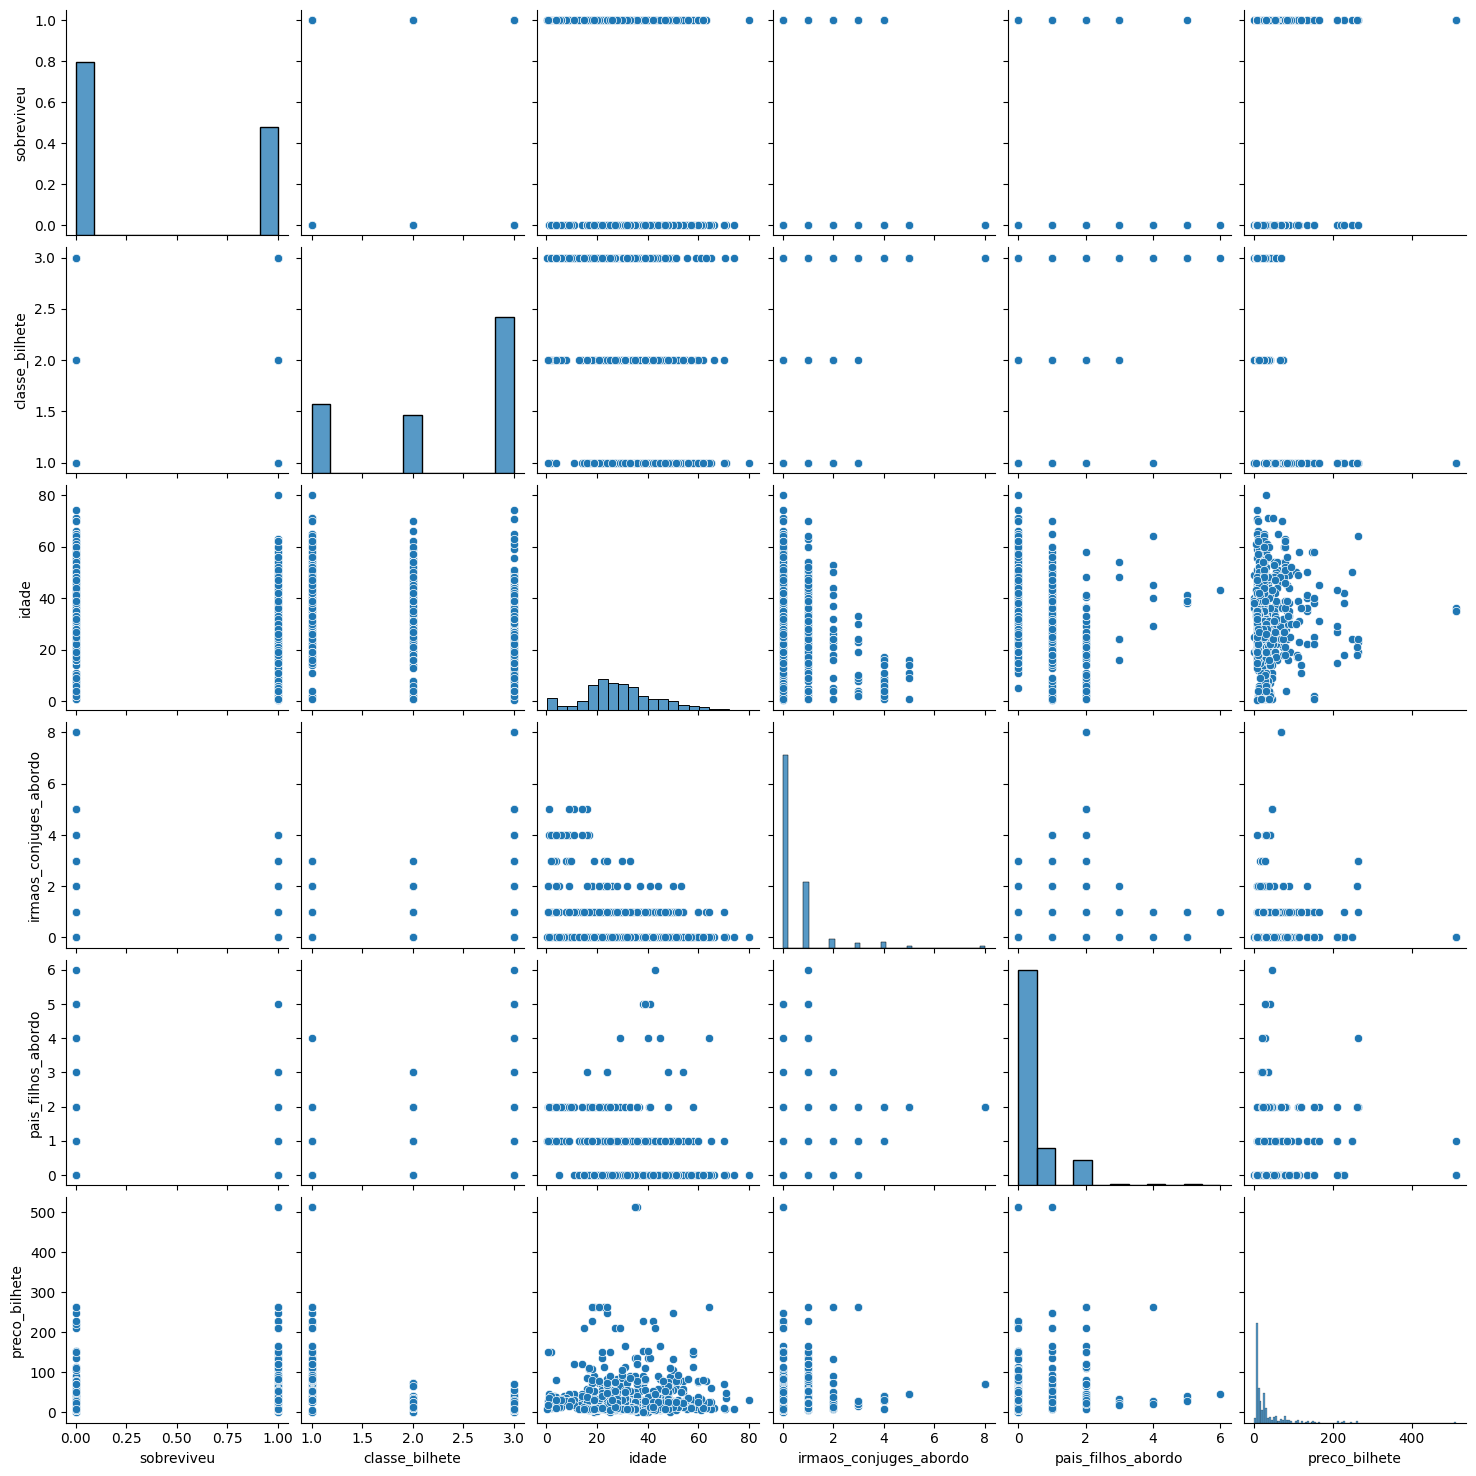

In [76]:
# Plotando gráficos de dispersão
sns.pairplot(df)

<AxesSubplot: >

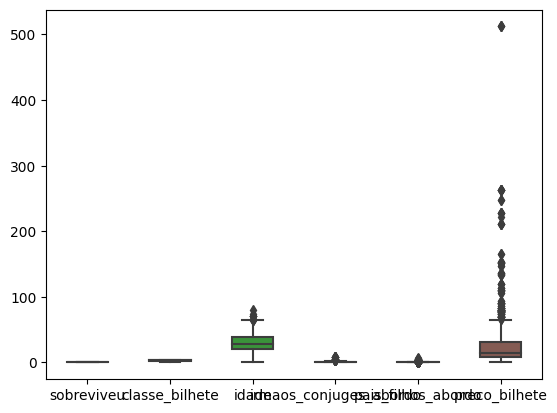

In [81]:
# Plotando o boxplot
sns.boxplot(data=df,width=0.5)

##  Visualize e entenda todas as colunas categóricas.
#### Perguntas guias para as categorias categóricas:
- Existem dados faltantes no seu conjunto? 
- Conseguimos extrair alguma informação nas colunas `numero_bilhete` e `cabine_numero`? ([Dica](https://pt.wikipedia.org/wiki/Instala%C3%A7%C3%B5es_da_primeira_classe_do_RMS_Titanic))
- Existe alguma casualidade ou correlação entre as categorias?
- Existe alguma relação entre a `classe_bilhete` e o `cabine_numero`?

#### Existem dados faltantes no seu conjunto?

   Count          Column
0    687   cabine_numero
1      2  local_embarque


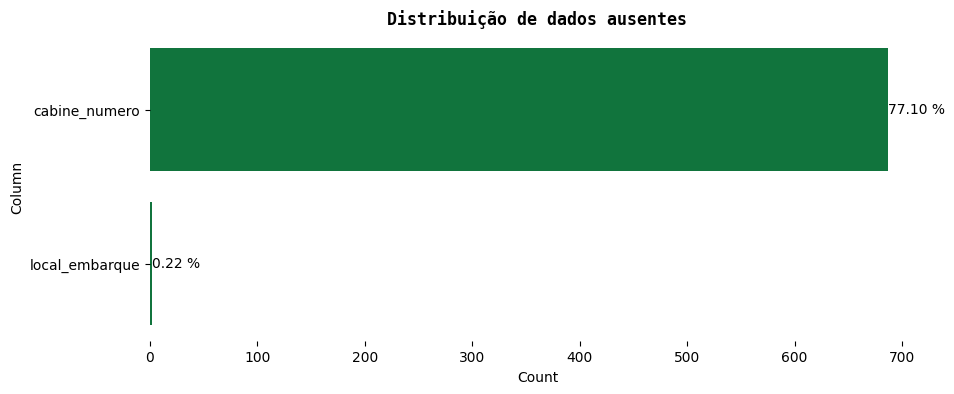

In [8]:
# Existem dados faltantes no seu conjunto?


# Tabela com as informações de dados faltantes total
missing_data_size = df.select_dtypes(exclude=[np.number]).isnull().sum()
missing_data_columns = ((missing_data_size[missing_data_size>0]).sort_values(ascending=False).to_frame(name='Count'))
missing_data_columns = (missing_data_columns.assign(Column=missing_data_columns.index)).reset_index(drop=True)
print(missing_data_columns)

# Gráfico com as informações de dados faltantes em porcentagem
plt.figure(figsize=(10,4))
ax = sns.barplot(data=missing_data_columns,x='Count',y='Column',color='#00853B')
sns.despine(left=True, bottom=True)
ax.bar_label(ax.containers[0], labels=[f"{i:.2f} %" for i in missing_data_columns.Count.astype(int) / len(df)*100])
plt.title(
    "Distribuição de dados ausentes",
    fontsize='large',
    loc='center',
    fontweight='bold',
    family='monospace')
plt.show()
ax.figure.savefig("missing_data_cat.jpg")

#### Conseguimos extrair alguma informação nas colunas 'numero_bilhete' e 'cabine_numero'?

In [15]:
# Conseguimos extrair alguma informação nas colunas 'numero_bilhete' e 'cabine_numero'?


df.head()
# Create a new DataFrame that includes only rows with valid cabin information
df_cabin = df.dropna(subset=['cabine_numero']).copy()

# Extract the deck level from the cabin number
df_cabin['Deck'] = df_cabin['cabine_numero'].str.slice(0,1)

# Count the number of passengers by deck level and sort by alphabetical order
deck_counts = df_cabin['Deck'].value_counts().sort_index()

# Print the counts of passengers by deck level
print(deck_counts)

A    15
B    47
C    59
D    33
E    32
F    13
G     4
T     1
Name: Deck, dtype: int64


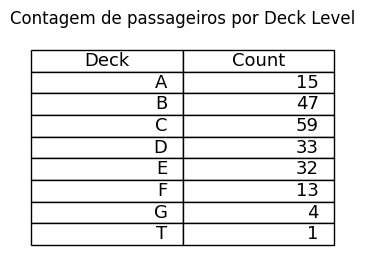

<Figure size 640x480 with 0 Axes>

In [27]:
# Create a new DataFrame that includes only rows with valid cabin information
df_cabin = df.dropna(subset=['cabine_numero']).copy()

# Extract the deck level from the cabin number
df_cabin['Deck'] = df_cabin['cabine_numero'].str.slice(0,1)

# Count the number of passengers by deck level and sort by alphabetical order
deck_counts = df_cabin['Deck'].value_counts().sort_index()

# Convert the counts to a DataFrame
deck_counts_df = pd.DataFrame({'Deck': deck_counts.index, 'Count': deck_counts.values})

# Create a table
fig, ax = plt.subplots(figsize=(3,3))
ax.axis('off')
ax.axis('tight')
table = ax.table(cellText=deck_counts_df.values, colLabels=deck_counts_df.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(13)
table.scale(1.3, 1.3)

# Set the title
ax.set_title('Contagem de passageiros por Deck Level')

plt.show()

# Save the table as an image
plt.savefig('deck_counts.jpg', bbox_inches='tight')

In [19]:

# Extract the prefix of the ticket number
df['TicketPrefix'] = df['numero_bilhete'].str.extract('([A-Za-z]+)', expand=False)

# Count the number of passengers by ticket prefix
prefix_counts = df['TicketPrefix'].value_counts()

# Print the counts
print(prefix_counts)

PC       60
C        33
A        29
STON     18
SOTON    17
S        14
CA       14
SC       13
W        11
F         6
LINE      4
PP        3
P         2
WE        2
SO        1
Fa        1
SW        1
SCO       1
Name: TicketPrefix, dtype: int64


#### Existe alguma casualidade ou correlação entre as categorias?

sobreviveu      False  True 
classe_bilhete              
1                  80    136
2                  97     87
3                 372    119
Chi-square test statistic: 102.8890
P-value: 0.0000
Degrees of freedom: 2
Expected frequencies:
[[133.09090909  82.90909091]
 [113.37373737  70.62626263]
 [302.53535354 188.46464646]]


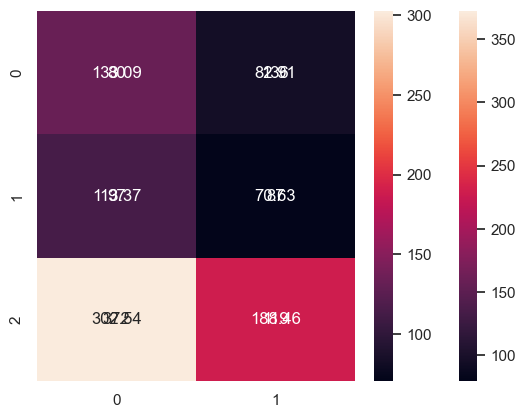

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

categorica = [
    "classe_bilhete",
    "genero",
    "numero_bilhete",
    "cabine_numero",
    "local_embarque",
    "sobreviveu",
]

# Create a contingency table of Pclass and Survived
contingency_table = pd.crosstab(df['classe_bilhete'], df['sobreviveu'])

# Print the contingency table
print(contingency_table)

# Create a heatmap of the contingency table
sns.heatmap(contingency_table, annot=True, fmt='d')

# Perform a chi-squared test for independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results of the test
print(f"Chi-square test statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

# Create a heatmap of the expected frequencies
sns.heatmap(expected, annot=True, fmt='.2f')

# Show the plots
plt.show()

# Forma como o material faz
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# Forma que eu acho mais legal:
# plotar o heatmap para as variáveis numéricas
ax = plt.axes()
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', fmt='.2f', linewidths=0.1,
            vmax=1.0, square=True, linecolor='white', ax=ax, annot=True)

# sns.heatmap(data, ax = ax)

ax.set_title('AJEITAR TITULO')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Load the Titanic dataset
df = pd.read_csv('train.csv')

# Convert Sex variable to binary
df['Sex'] = np.where(df['Sex'] == 'female', 1, 0)

# Convert Pclass variable to dummy variables
pclass_dummies = pd.get_dummies(df['Pclass'], prefix='Pclass', drop_first=True)
df = pd.concat([df, pclass_dummies], axis=1)

# Define the predictor variables and the outcome variable
X = df[['Sex', 'Pclass_2', 'Pclass_3']]
y = df['Survived']

# Fit a logistic regression model
X = sm.add_constant(X) # Add a constant intercept term
model = sm.Logit(y, X).fit()

# Print the model summary
print(model.summary())

# #Finally, we print the model summary using the summary() method of the LogitResults object 
# returned by fit(). The model summary displays the coefficients and standard errors of the predictor 
# variables, the Wald chi-square test statistic and p-value for each predictor variable, 
# and the goodness-of-fit statistics of the model.

# # Note that logistic regression assumes a linear relationship between the predictor 
# variables and the log-odds of the outcome variable. If the relationship is nonlinear or 
# there are interactions between the predictor variables, you may need to use more 
# complex modeling techniques such as polynomial regression or decision trees. 
# Also, keep in mind that logistic regression only models the association between the predictor 
# variables and the outcome variable, but does not establish causality.

#### Existe alguma relação entre a classe_bilhete e o cabine_numero?

In [ ]:
# Sim, é praticamente a mesma pergunta da parte de cima, obvio que tem

#### Perguntas chave para as categorias categóricas:
- Há alguma influência de pertencer a algum grupo de alguma cabine na sua sobrevivência?
- Há algum padrão no `numero_bilhete`?
- Há algum padrão na `cabine_numero`?

#### Há alguma influência de pertencer a algum grupo de alguma cabine na sua sobrevivência?

In [ ]:
# Old que tem influencia sim

#### Há algum padrão no numero_bilhete?

In [21]:
# Old que tem mas eu não sei qual é
# Correção: Se tiver é um padrão bem falho viu, péssimo

#### Há algum padrão na cabine_numero?

In [ ]:
# Old que tem, essa daí eu sei, só preciso fazer uma tabela mais bonita

# Perguntas do Desafio:

### O protocolo marítimo da época do Titanic tinha foco em dar prioridade a crianças e mulheres, analisando os dados podemos dizer se este protocolo foi seguido? 

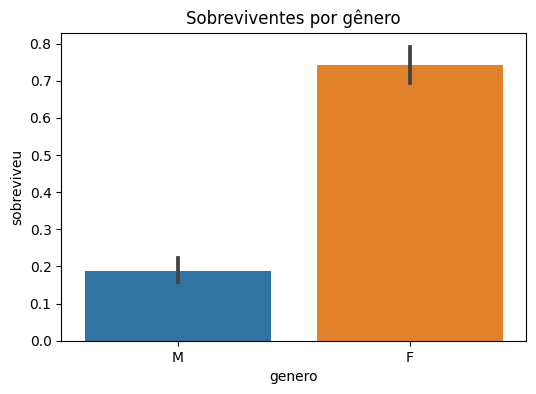

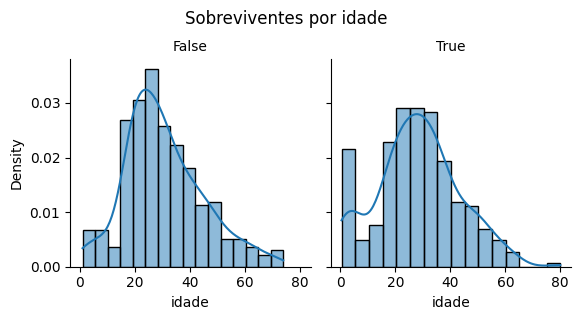

In [33]:
# Plotar os gráficos para Survived vs. Sex, Pclass e Embarked
fig= plt.subplots(figsize=(6,4))
ax = sns.barplot(x='genero', y='sobreviveu', data=df)
ax.set_title('Sobreviventes por gênero')
plt.show()
ax.figure.savefig("sobrevientes_genero.jpg")

# ver influência da idade na probabilidade de sobrevivência
age_survived = sns.FacetGrid(df, col='sobreviveu')
ax2 = age_survived.map(sns.histplot, 'idade', kde=True, stat="density")
age_survived.set_titles('{col_name}')
ax2.fig.suptitle('Sobreviventes por idade', y=1.05)
plt.show()
ax2.figure.savefig("sobreviventes_idade.jpg")


Sua resposta: Podemos perceber por meio dos dois gráficos apresentados que pessoas do gênero feminino e crianças sobreviveram mais à tragédia, o que indica que o protocolo marítimo da época foi seguido

### Você pode dizer que houve alguma influência do poder aquisitivo na sobrevivência do acidente?

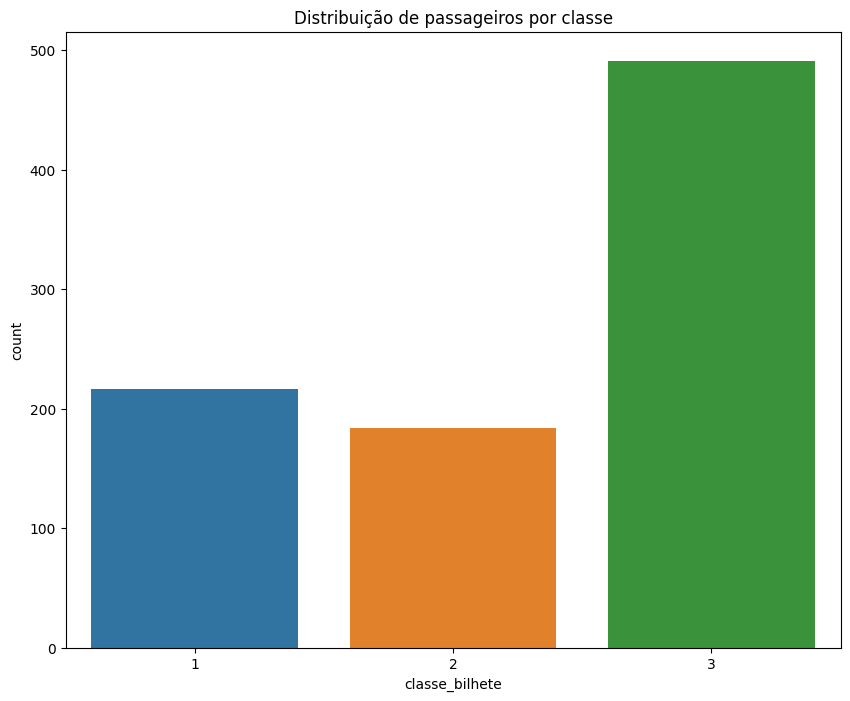

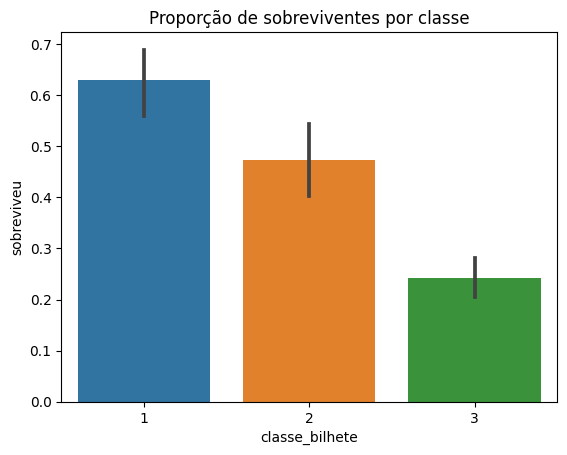

In [37]:
fig = plt.subplots(figsize=(10,8))
# distribuição dos passageiros por classe socioeconômica:
ax_dist = sns.countplot(x='classe_bilhete', data=df)
ax_dist.set_title('Distribuição de passageiros por classe')
plt.show()
ax_dist.figure.savefig("dist_passageiros_classe.jpg")

# proporção de sobrevivência por classe socioeconômica:
ax_prop = sns.barplot(x='classe_bilhete', y='sobreviveu', data=df)
ax_prop.set_title('Proporção de sobreviventes por classe')
plt.show()
ax_prop.figure.savefig("sobreviventes_classe_social.jpg")

Sua resposta: Podemos perceber que ouve influência sim

### Ter uma família no barco influenciou negativamente ou positivamente para a sua sobrevivência?

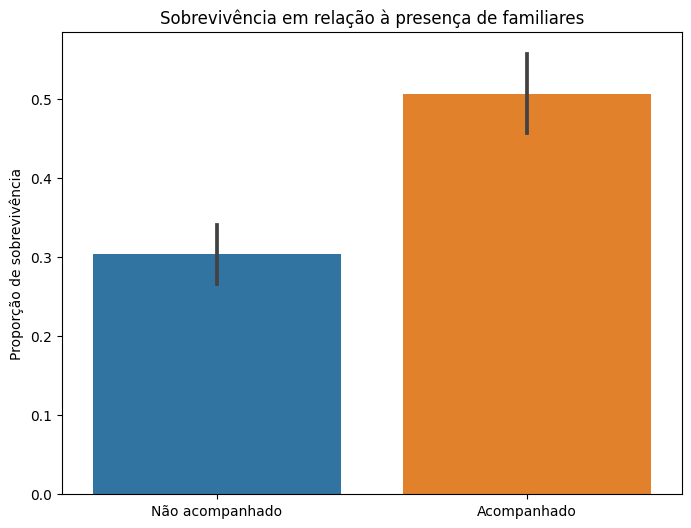

In [39]:
numerica = [
    "idade",
    "preco_bilhete",
    "irmaos_conjuges_abordo",
    "pais_filhos_abordo"
]

# Criar nova coluna 'acompanhado' que indica se a pessoa estava ou não acompanhada
df['acompanhado'] = (df['pais_filhos_abordo'] + df['irmaos_conjuges_abordo']) > 0

# Converter valores True/False em 1/0
df['acompanhado'] = df['acompanhado'].astype(int)

# Criar gráfico de barras com proporção de sobrevivência por acompanhamento familiar
fig, ax = plt.subplots(figsize=(8, 6))
sns.barplot(x='acompanhado', y='sobreviveu', data=df, ax=ax)
ax.set_xticklabels(['Não acompanhado', 'Acompanhado'])
ax.set_xlabel('')
ax.set_ylabel('Proporção de sobrevivência')
ax.set_title('Sobrevivência em relação à presença de familiares')

# Salvar gráfico em um arquivo
fig.savefig('sobrevivencia_familia.jpg', dpi=300)

plt.show()

Sua resposta: Ter uma família à bordo influenciou positivamente na sobrevivência

### Qual o fator que foi mais importante e menos importante para determinar a sobrevivência para esta população?

Correlação entre as variáveis e a sobrevivência:
sobreviveu        1.000000
genero            0.543351
preco_bilhete     0.257307
tem_familia       0.203367
idade            -0.069809
classe_bilhete   -0.338481
Name: sobreviveu, dtype: float64


C:\Users\User\AppData\Local\Temp\ipykernel_16160\2978231270.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(corr_matrix.index, rotation=90)


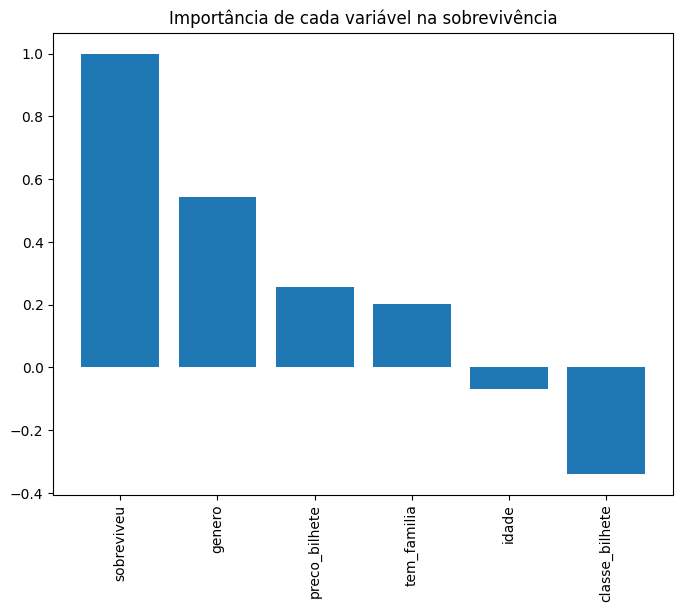

,sobreviveu,classe_bilhete,genero,idade,preco_bilhete,tem_familia
id_passageiro,,,,,,
1,False,3,0,22.0,7.2500,1
2,True,1,1,38.0,71.2833,1
3,True,3,1,26.0,7.9250,0
4,True,1,1,35.0,53.1000,1
5,False,3,0,35.0,8.0500,0


In [40]:
df = pd.read_csv("titanic.csv").set_index("id_passageiro")
df['tem_familia'] = (df['irmaos_conjuges_abordo'] + df['pais_filhos_abordo']) > 0

# Transformando variáveis categóricas em numéricas
df['genero'] = df['genero'].map({'M': 0, 'F': 1})
df['tem_familia'] = df['tem_familia'].map({False: 0, True: 1})

df = df.drop(columns=['irmaos_conjuges_abordo','pais_filhos_abordo', 'numero_bilhete', 'cabine_numero', 'local_embarque'])

# Preenchendo valores faltantes na variável 'idade' com a média
df['idade'] = df['idade'].fillna(df['idade'].mean())

# Calculando a matriz de correlação entre as variáveis e a sobrevivência
corr_matrix = df.corr(method='pearson')['sobreviveu'].sort_values(ascending=False)
print("Correlação entre as variáveis e a sobrevivência:")
print(corr_matrix)

# Plotando um gráfico de barras com a importância de cada variável
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(x=corr_matrix.index, height=corr_matrix.values)
ax.set_xticklabels(corr_matrix.index, rotation=90)
ax.set_title("Importância de cada variável na sobrevivência")
plt.show()
fig.savefig('importancia_por_variavel.jpg', dpi=300)
df.head()

Sua resposta: Os fatores que mais influenciaram foram gênero e classe econômica, enquanto os que menos influenciaram foram a idade do passageiro e se possui família ou não à bordo

### Qual o perfil de quem não sobreviveu? E qual é o perfil de quem sobreviveu?
- Entenda Perfil como: Gênero, Idade e Classe Social. Caso você identifique alguma nova característica pode adicioná-la ao perfil.

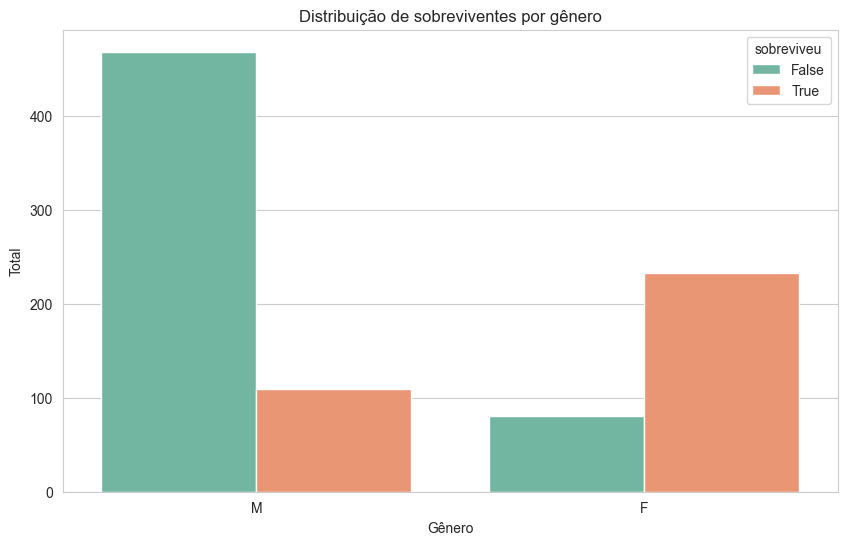

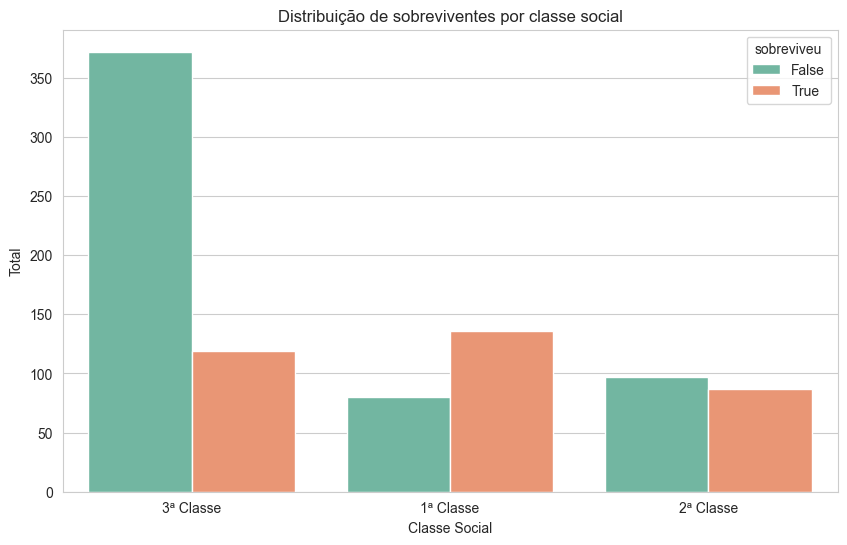

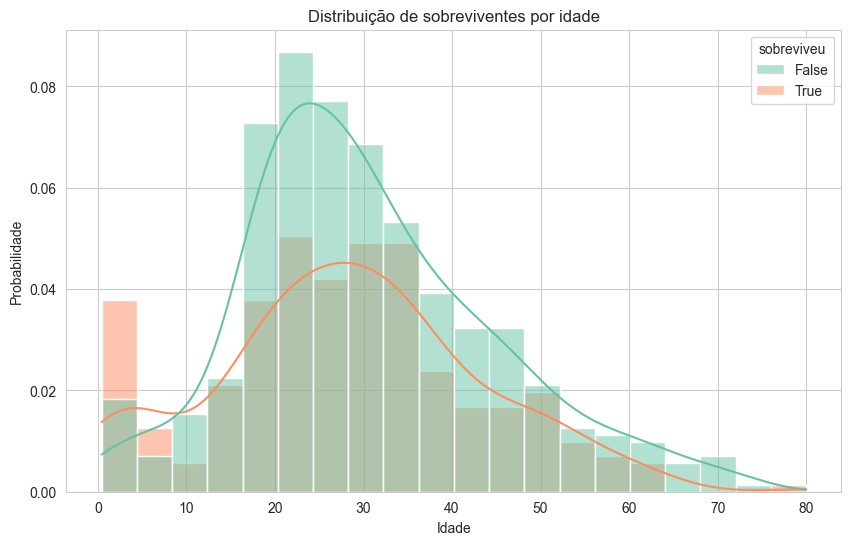

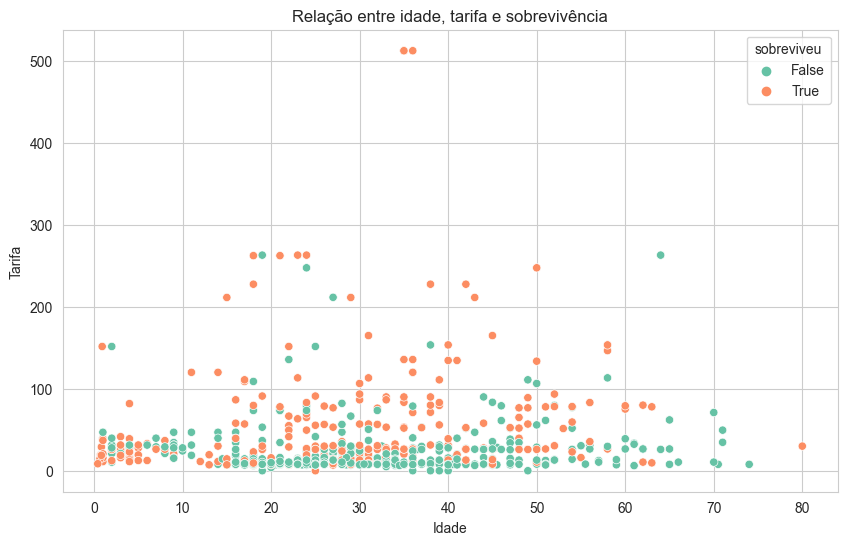

In [42]:
# Lendo novamente o dataset devido à retirada de variáveis anterior
df = pd.read_csv("titanic.csv")

# Criando um dicionário para mapear os valores da coluna 'classe' para strings
classe_map = {1: '1ª Classe', 2: '2ª Classe', 3: '3ª Classe'}
df['classe_str'] = df['classe_bilhete'].map(classe_map)

# Definindo os estilos do Seaborn
sns.set_style("whitegrid")
sns.set_palette("Set2")

# Criando um gráfico de barras empilhadas para comparar a distribuição de sobreviventes e não sobreviventes por gênero, idade e classe social
fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='genero', hue='sobreviveu', data=df, ax=ax)
ax.set_xlabel("Gênero")
ax.set_ylabel("Total")
ax.set_title("Distribuição de sobreviventes por gênero")

fig, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x='classe_str', hue='sobreviveu', data=df, ax=ax)
ax.set_xlabel("Classe Social")
ax.set_ylabel("Total")
ax.set_title("Distribuição de sobreviventes por classe social")

fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=df, x='idade', hue='sobreviveu', stat='probability', kde=True, ax=ax)
ax.set_xlabel("Idade")
ax.set_ylabel("Probabilidade")
ax.set_title("Distribuição de sobreviventes por idade")
ax.figure.savefig('dist_sobre_idade.jpg', dpi=300)

# Criando um gráfico de dispersão para comparar a idade e a tarifa paga pelos passageiros
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x='idade', y='preco_bilhete', hue='sobreviveu', data=df, ax=ax)
ax.set_xlabel("Idade")
ax.set_ylabel("Tarifa")
ax.set_title("Relação entre idade, tarifa e sobrevivência")

plt.show()

Sua resposta: O perfil do não sobrevivente é do gênero Masculino, 3º classe e entre 20-30 anos. Enquanto o perfil do sobrevivente é do gênero feminino, 1º classe e entre 20-30 anos também, embora seja importante ressaltar que na faixa etária de 0-10 a maioria é sobrevivente, o que indica que a maioria das crianças sobreviveram independente de gênero e classe, porém por serem minoria não representam o perfil.

# Predições - Aprendizado de Máquina

In [67]:
df = pd.read_csv("titanic.csv").set_index("id_passageiro")

y = df.pop("sobreviveu") # target
X = df

#### Perguntas guias para criação do modelo:
- Como você pretende tratar os dados faltantes do seu dataset antes de fornecer para o modelo? 
- Você consegue criar alguma nova coluna (feature) para fornecer ao modelo?
- Existe alguma coluna que pode ser removida sob algum critério? Como por exemplo correlação?
- Você encontrou `outliers` no dataset? Se sim qual ação foi feita com estes dados?
- Quais normatizações você aplicou nos dados categóricos e numéricos?

In [68]:
# Preparação das variáveis para o modelo:
# - Retirada de colunas que não serão usadas
# - Conversão de strings para ints binarios no gênero
# - Preenchimento dos valores faltantes na idade e no preço_bilhete com a média

df.drop(["numero_bilhete","cabine_numero","local_embarque"],axis=1,inplace=True)

# variaveis = ['Sex_binario', 'Age', 'Pclass', 'SibSp', 'Parch', 'Fare']

# X = df[variaveis].fillna(-1)
# => OBS: olhar melhor se é melhor preencher com a média ou com (-1)
# age
age_median = df['idade'].median()
df['idade'].fillna(age_median, inplace=True)

# fare
fare_median = df['preco_bilhete'].median()
df['preco_bilhete'].fillna(fare_median, inplace=True)

df['genero'] = df['genero'].map({'M': 0, 'F': 1})
df.head()

,classe_bilhete,genero,idade,irmaos_conjuges_abordo,pais_filhos_abordo,preco_bilhete
id_passageiro,,,,,,
1,3,0,22.0,1,0,7.2500
2,1,1,38.0,1,0,71.2833
3,3,1,26.0,0,0,7.9250
4,1,1,35.0,1,0,53.1000
5,3,0,35.0,0,0,8.0500


In [71]:
# Quais normatizações você aplicou nos dados categóricos e numéricos?

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize numerical variables using Min-max scaling
scaler = MinMaxScaler()
df[['idade', 'preco_bilhete']] = scaler.fit_transform(df[['idade', 'preco_bilhete']])

# Normalize numerical variables using Z-score normalization
scaler = StandardScaler()
df[['idade', 'preco_bilhete']] = scaler.fit_transform(df[['idade', 'preco_bilhete']])

## Modelos:

In [72]:
# Modelo de Regressão Logística
lr_model = LogisticRegression(solver='liblinear')
lr_model.fit(X, y)
# verificar a acurácia do modelo
acc_logReg = round(lr_model.score(X, y) * 100, 2)
print("Acurácia do modelo de Regressão Logística: {}".format(acc_logReg))


# Modelo de árvore de decisão
decision_tree_model = DecisionTreeClassifier(max_depth=3)
decision_tree_model.fit(X, y)
# verificar a acurácia do modelo
acc_tree = round(decision_tree_model.score(X, y) * 100, 2)
print("Acurácia do modelo de Árvore de Decisão: {}".format(acc_tree))


# Modelo de Random Forest
random_tree_model = RandomForestClassifier(n_estimators=100, n_jobs=-1, random_state=0)
random_tree_model.fit(X, y)
# verificar a acurácia do modelo
acc_tree = round(random_tree_model.score(X, y) * 100, 2)
print("Acurácia do modelo de Árvore Aleatória: {}".format(acc_tree))

Acurácia do modelo de Regressão Logística: 79.91
Acurácia do modelo de Árvore de Decisão: 82.72
Acurácia do modelo de Árvore Aleatória: 97.98


In [22]:
# Carregando o dataset novamente
df = pd.read_csv('titanic.csv')

# Treat missing values in 'age' and 'fare' variables
df['idade'].fillna(df['idade'].median(), inplace=True)
df['preco_bilhete'].fillna(df['preco_bilhete'].median(), inplace=True)

# Create new columns if needed
df['FamilySize'] = df['irmaos_conjuges_abordo'] + df['pais_filhos_abordo'] + 1
df['IsAlone'] = np.where(df['FamilySize'] == 1, 1, 0)

# Remove columns if needed
df.drop(['id_passageiro', 'cabine_numero', 'numero_bilhete'], axis=1, inplace=True)

def cal_outliers(col):
    # calcula os limites para identificar outliers
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # seleciona os outliers
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # trata os outliers
    df[col] = df[col].clip(lower_bound, upper_bound)

cal_outliers('idade')
cal_outliers('preco_bilhete')
cal_outliers('irmaos_conjuges_abordo')
cal_outliers('pais_filhos_abordo')

# Normalização dos dados com Z-score
scaler = StandardScaler()
df[['idade', 'preco_bilhete']] = scaler.fit_transform(df[['idade', 'preco_bilhete']])

# Converter 'genero' em 0 e 1
df['genero'] = df['genero'].map({'M': 0, 'F': 1})

# dummie variables para 'local_embarque'
embarked_dummies = pd.get_dummies(df['local_embarque'], prefix='local_embarque')
df = pd.concat([df, embarked_dummies], axis=1)
df.drop('local_embarque', axis=1, inplace=True)

# Split data into training and testing sets
X = df.drop(['sobreviveu'], axis=1)
y = df['sobreviveu']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinamento Modelo de Regressão Logística
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Treinamento Modelo de Árvore de decisão
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# # Treinamento Modelo repeated k fold 
# rkf_model = DecisionTreeClassifier(random_state=42)
# rkf_model.fit(X_train, y_train)

# # Treinamento Modelo random forest
# rfc_model = DecisionTreeClassifier(random_state=42)
# rfc_model.fit(X_train, y_train)

# # Avaliação Modelo repeated k fold
# rfc_y_pred = rfc_model.predict(X_test)
# rfc_acc = accuracy_score(y_test, rfc_y_pred)
# rfc_prec = precision_score(y_test, rfc_y_pred)
# rfc_rec = recall_score(y_test, rfc_y_pred)
# print(f"Logistic Regression Accuracy: {rfc_acc}")
# print(f"Logistic Regression Precision: {rfc_prec}")
# print(f"Logistic Regression Recall: {rfc_rec}")

# # Avaliação Modelo random forest
# rkf_y_pred = rkf_model.predict(X_test)
# rkf_acc = accuracy_score(y_test, rkf_y_pred)
# rkf_prec = precision_score(y_test, rkf_y_pred)
# rkf_rec = recall_score(y_test, rkf_y_pred)
# print(f"Logistic Regression Accuracy: {rkf_acc}")
# print(f"Logistic Regression Precision: {rkf_prec}")
# print(f"Logistic Regression Recall: {rkf_rec}")

# Avaliação do modelo de Regressão Logística
lr_y_pred = lr_model.predict(X_test)
lr_acc = accuracy_score(y_test, lr_y_pred)
lr_prec = precision_score(y_test, lr_y_pred)
lr_rec = recall_score(y_test, lr_y_pred)
print(f"Taxa de precisão do modelo Regressão Logística: {(lr_acc*100):.2f}")
print(f"Taxa de acurácia do modelo Regressão Logística: {(lr_prec*100):.2f}")
print(f"Taxa de recall do modelo Regressão Logística: {(lr_rec*100):.2f}")

# Avaliação do modelo árvore de decisão
dt_y_pred = dt_model.predict(X_test)
dt_acc = accuracy_score(y_test, dt_y_pred)
dt_prec = precision_score(y_test, dt_y_pred)
dt_rec = recall_score(y_test, dt_y_pred)
print(f"Taxa de precisão do modelo Árvore de decisão: {(dt_acc*100):.2f}")
print(f"Taxa de acurácia do modelo Árvore de decisão: {(dt_prec*100):.2f}")
print(f"Taxa de recall do modelo Árvore de decisão: {(dt_rec*100):.2f}")

# Comparação dos dois modelos e escolhendo o melhor
if lr_acc > dt_acc:
    print("O modelo de Regressão Logística é o melhor modelo.")
else:
    print("O modelo de Árvore de Decisão é o melhor modelo.")


Taxa de precisão do modelo Regressão Logística: 79.89
Taxa de acurácia do modelo Regressão Logística: 77.14
Taxa de recall do modelo Regressão Logística: 72.97
Taxa de precisão do modelo Árvore de decisão: 77.09
Taxa de acurácia do modelo Árvore de decisão: 71.43
Taxa de recall do modelo Árvore de decisão: 74.32
O modelo de Regressão Logística é o melhor modelo.


# Perguntas do Desafio  - Modelo:

### Quais etapas de processamento foram realizadas e o porquê de cada uma?
- Responda de maneira superficial uma vez que você já mostrou via código o que foi feito, quais as etapas do seu dado desde que ele é carregado pelo pandas até ser fornecido ao modelo durante o treinamento.

### Dos modelos testados qual foi melhor? Porque? Apresenta as métricas do seu melhor modelo. 
- Sabendo que você testou pelo menos 2 modelos diferentes, como você definiu o que é o melhor e qual é o melhor.

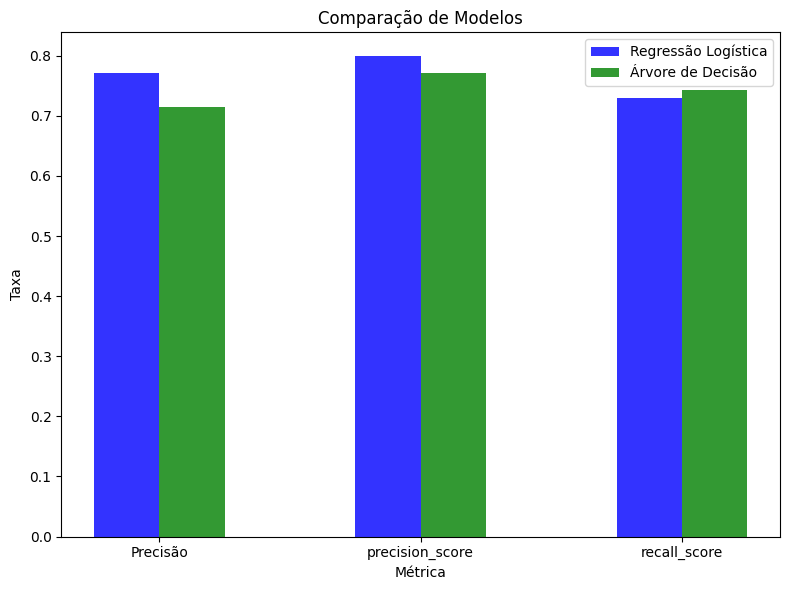

In [27]:
import matplotlib.pyplot as plt

# Taxas do modelo de Regressão Logística
lr_acc = accuracy_score(y_test, lr_y_pred)
lr_prec = precision_score(y_test, lr_y_pred)
lr_rec = recall_score(y_test, lr_y_pred)

# Taxas do modelo de Árvore de Decisão
dt_acc = accuracy_score(y_test, dt_y_pred)
dt_prec = precision_score(y_test, dt_y_pred)
dt_rec = recall_score(y_test, dt_y_pred)

# Criar um gráfico de barras para comparar as taxas
fig, ax = plt.subplots(figsize=(8, 6))

model_names = ['Regressão Logística', 'Árvore de Decisão']
metrics = ['Precisão', 'precision_score', 'recall_score']

bar_width = 0.25
opacity = 0.8

lr_values = [lr_prec, lr_acc, lr_rec]
dt_values = [dt_prec, dt_acc, dt_rec]

index = np.arange(len(metrics))

rects1 = ax.bar(index, lr_values, bar_width,
                alpha=opacity,
                color='b',
                label='Regressão Logística')

rects2 = ax.bar(index + bar_width, dt_values, bar_width,
                alpha=opacity,
                color='g',
                label='Árvore de Decisão')

ax.set_xlabel('Métrica')
ax.set_ylabel('Taxa')
ax.set_title('Comparação de Modelos')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.show()


### Seu  melhor modelo comete erros? Quais os pontos fracos dele?
- Saber os pontos fracos de seu modelo é crucial durante o seu uso, tente identificar com uma matriz confusão onde o seu modelo erra e o perfil do dado que ele erra.

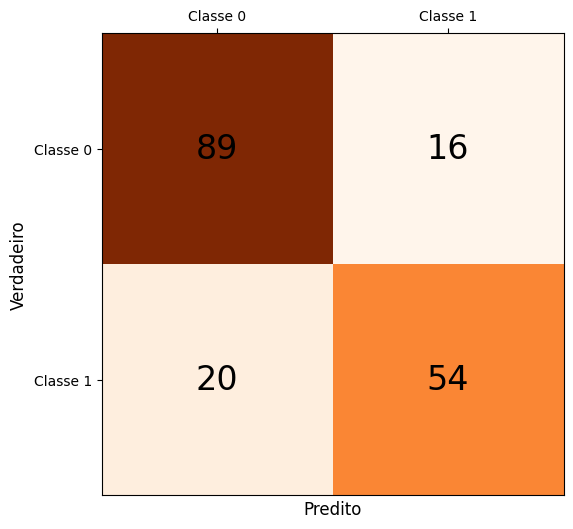

In [30]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# supondo que y_test é a lista de valores verdadeiros e y_pred é a lista de valores previstos pelo modelo
cm = confusion_matrix(y_test, lr_y_pred)

# plotar a matriz de confusão
fig, ax = plt.subplots(figsize=(6, 6))
colors = ['Blues', 'Oranges']

# plotar a matriz de confusão
ax.imshow(cm, cmap=colors[1])
# ax.colorbar()
ax.grid(False)
ax.set_xlabel('Predito', fontsize=12, color='black')
ax.set_ylabel('Verdadeiro', fontsize=12, color='black')
ax.xaxis.set(ticks=(0, 1), ticklabels=('Classe 0', 'Classe 1'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Classe 0', 'Classe 1'))
ax.xaxis.tick_top()
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='black', fontsize=24)
plt.show()


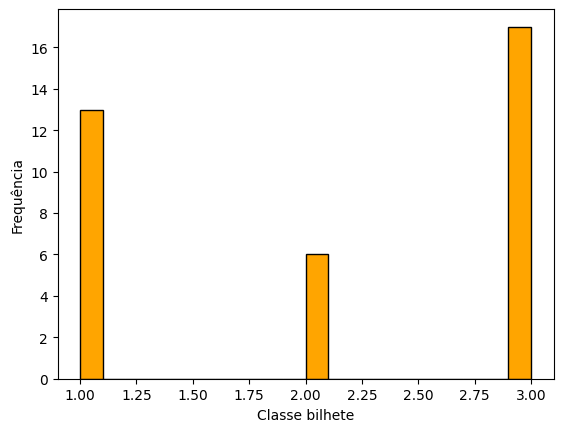

In [31]:
# Calcula a matriz de confusão
# y_true = y_test
# y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, lr_y_pred)

# Identifica os índices dos erros de previsão
error_idx = np.where(lr_y_pred != y_test)[0]

# Plota um histograma da classe dos passageiros com erro de previsão
plt.hist(X_test.iloc[error_idx, 0], bins=20, edgecolor='black', color='orange')
plt.xlabel('Classe bilhete')
plt.ylabel('Frequência')
plt.show()